In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import pickle

### 1. Data Collection

In [3]:
# Load the dataset
df = pd.read_csv('Customer_Churn.csv')

# Display the first few rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2. Data Preprocessing

In [4]:
# Drop irrelevant columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Encode Categorical Features

# Encode Gender
gender_encoder = LabelEncoder()
gender_encoder.fit(df['Gender'])
df['Gender'] = gender_encoder.transform(df['Gender'])

# Encode Geography
geo_encoder = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')
geo_encoded = geo_encoder.fit_transform(df[['Geography']])
geo_df = pd.DataFrame(geo_encoded, columns=geo_encoder.get_feature_names_out(['Geography']))

# Combine
df = pd.concat([df.drop('Geography', axis=1), geo_df], axis=1)

# Show the result
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [6]:
# Save the encoder
with open("encoders.pkl", "wb") as file:
    pickle.dump({"gender_encoder": gender_encoder, "geo_encoder": geo_encoder}, file)

### 3. Exploratory Data Analysis

In [7]:
# First Moment Business Decision (Measures of Central Tendency)

# Calculate Mean, Median, Mode for each column
for column in df.columns:
    print(f"📊 {column}")
    print("Mean:", df[column].mean())
    print("Median:", df[column].median())
    print("Mode:", df[column].mode().tolist())  # mode() can return multiple values
    print("-" * 20)


📊 CreditScore
Mean: 650.5288
Median: 652.0
Mode: [850]
--------------------
📊 Gender
Mean: 0.5457
Median: 1.0
Mode: [1]
--------------------
📊 Age
Mean: 38.9218
Median: 37.0
Mode: [37]
--------------------
📊 Tenure
Mean: 5.0128
Median: 5.0
Mode: [2]
--------------------
📊 Balance
Mean: 76485.889288
Median: 97198.54000000001
Mode: [0.0]
--------------------
📊 NumOfProducts
Mean: 1.5302
Median: 1.0
Mode: [1]
--------------------
📊 HasCrCard
Mean: 0.7055
Median: 1.0
Mode: [1]
--------------------
📊 IsActiveMember
Mean: 0.5151
Median: 1.0
Mode: [1]
--------------------
📊 EstimatedSalary
Mean: 100090.239881
Median: 100193.915
Mode: [24924.92]
--------------------
📊 Exited
Mean: 0.2037
Median: 0.0
Mode: [0]
--------------------
📊 Geography_France
Mean: 0.5014
Median: 1.0
Mode: [1.0]
--------------------
📊 Geography_Germany
Mean: 0.2509
Median: 0.0
Mode: [0.0]
--------------------
📊 Geography_Spain
Mean: 0.2477
Median: 0.0
Mode: [0.0]
--------------------


In [8]:
# Second Moment Business Decision (Measures of Dispersion)

# Calculate Variance, Standard deviation, Range(Max - Min) for each column

for column in df.columns:
    variance = df[column].var()
    std_dev = df[column].std()
    value_range = df[column].max() - df[column].min()
    
    print(f"📊 {column}")
    print(f"Variance: {variance:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Range (Max - Min): {value_range:.2f}")
    print("-" * 20)


📊 CreditScore
Variance: 9341.86
Standard Deviation: 96.65
Range (Max - Min): 500.00
--------------------
📊 Gender
Variance: 0.25
Standard Deviation: 0.50
Range (Max - Min): 1.00
--------------------
📊 Age
Variance: 109.99
Standard Deviation: 10.49
Range (Max - Min): 74.00
--------------------
📊 Tenure
Variance: 8.36
Standard Deviation: 2.89
Range (Max - Min): 10.00
--------------------
📊 Balance
Variance: 3893436175.99
Standard Deviation: 62397.41
Range (Max - Min): 250898.09
--------------------
📊 NumOfProducts
Variance: 0.34
Standard Deviation: 0.58
Range (Max - Min): 3.00
--------------------
📊 HasCrCard
Variance: 0.21
Standard Deviation: 0.46
Range (Max - Min): 1.00
--------------------
📊 IsActiveMember
Variance: 0.25
Standard Deviation: 0.50
Range (Max - Min): 1.00
--------------------
📊 EstimatedSalary
Variance: 3307456784.13
Standard Deviation: 57510.49
Range (Max - Min): 199980.90
--------------------
📊 Exited
Variance: 0.16
Standard Deviation: 0.40
Range (Max - Min): 1.00
----

In [9]:
# Third Moment Business Decision (Skewness)

#  Calculate Skewness for each column
for column in df.columns:
    skew_val = df[column].skew()
    print(f"📊 {column}: {skew_val:.2f}")

📊 CreditScore: -0.07
📊 Gender: -0.18
📊 Age: 1.01
📊 Tenure: 0.01
📊 Balance: -0.14
📊 NumOfProducts: 0.75
📊 HasCrCard: -0.90
📊 IsActiveMember: -0.06
📊 EstimatedSalary: 0.00
📊 Exited: 1.47
📊 Geography_France: -0.01
📊 Geography_Germany: 1.15
📊 Geography_Spain: 1.17


In [10]:
# Fourth Moment Business Decision (Kurtosis)

#  Calculate Kurtosis for each column
for column in df.columns:
    kurt_val = df[column].kurt()
    print(f"📊 {column}: {kurt_val:.2f}")

📊 CreditScore: -0.43
📊 Gender: -1.97
📊 Age: 1.40
📊 Tenure: -1.17
📊 Balance: -1.49
📊 NumOfProducts: 0.58
📊 HasCrCard: -1.19
📊 IsActiveMember: -2.00
📊 EstimatedSalary: -1.18
📊 Exited: 0.17
📊 Geography_France: -2.00
📊 Geography_Germany: -0.68
📊 Geography_Spain: -0.63


- Vizualize Key Features

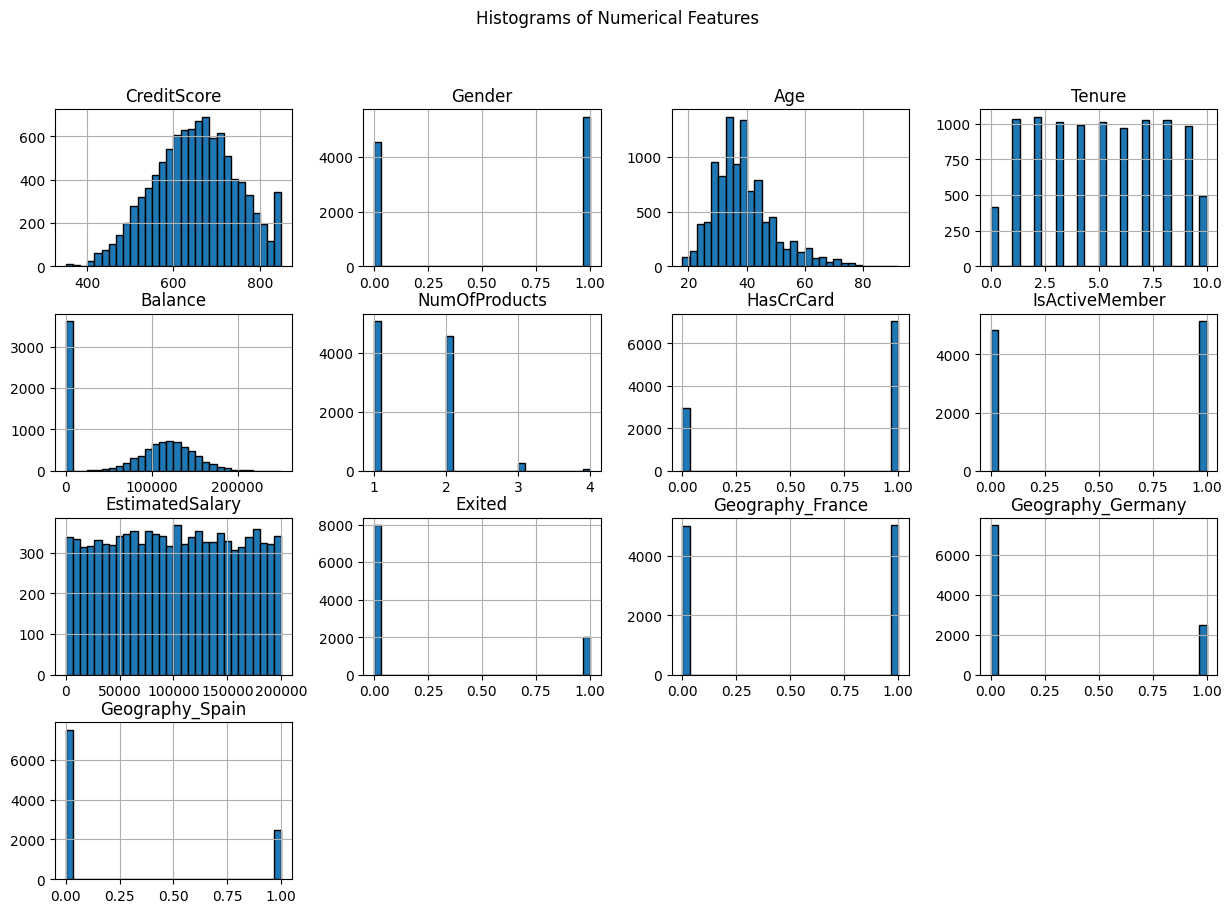

In [11]:
# Distribution of numerical features
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

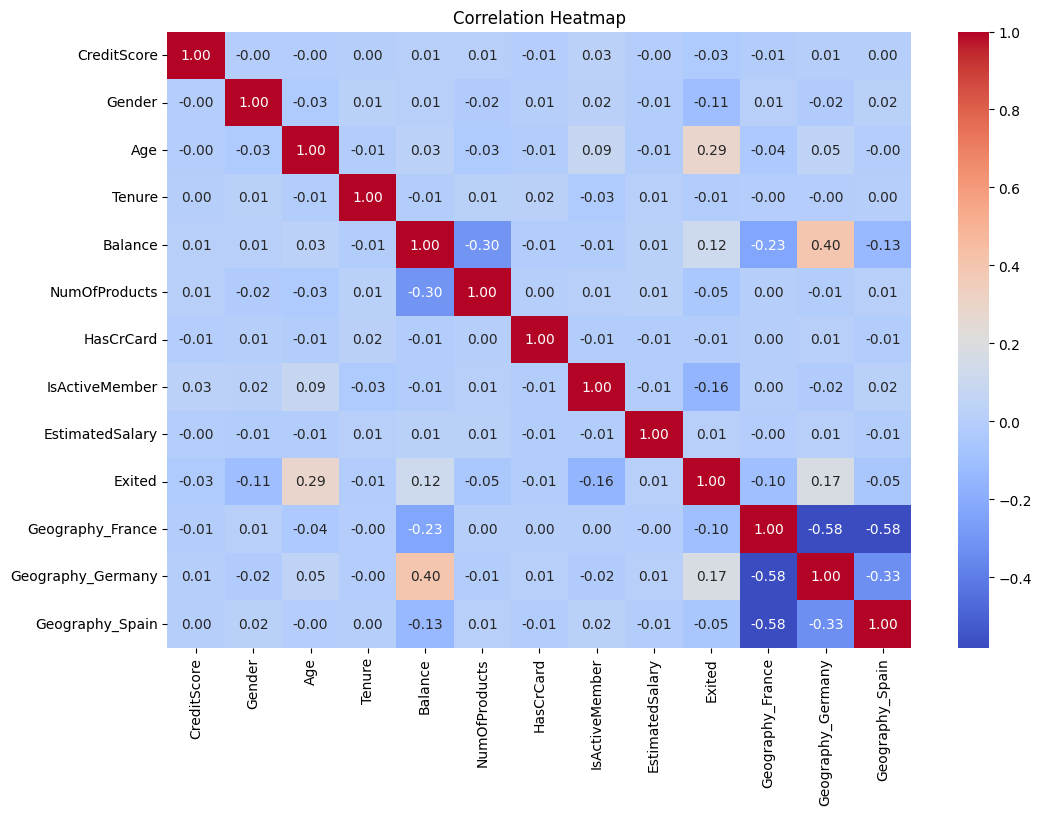

In [12]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

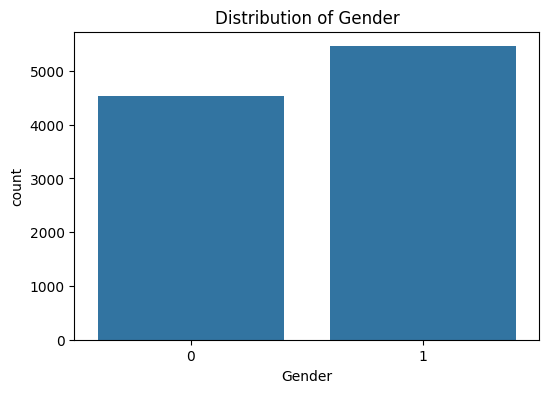

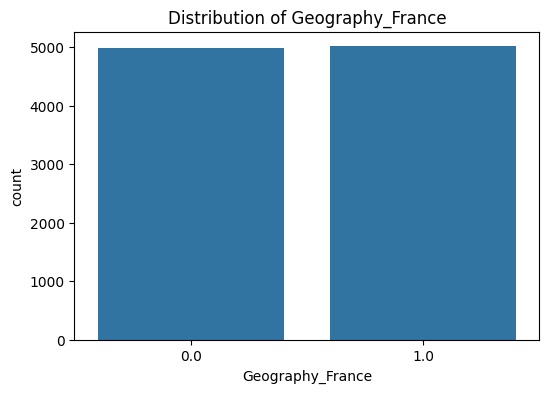

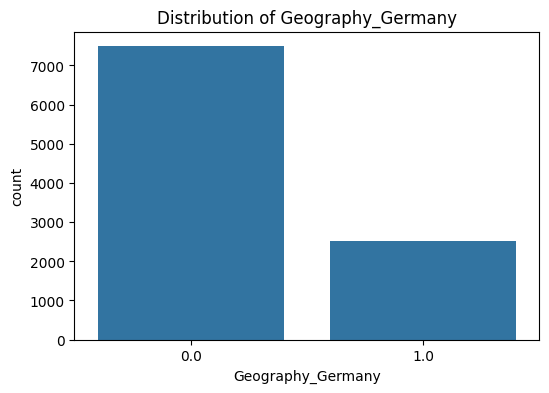

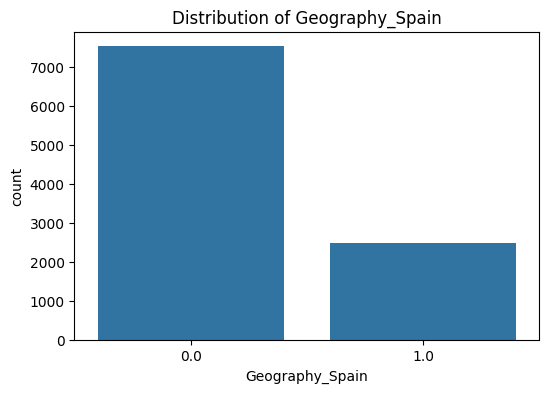

In [13]:
# Countplots for categorical features
categorical_cols = ['Gender'] + [col for col in df.columns if col.startswith("Geography_")]
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

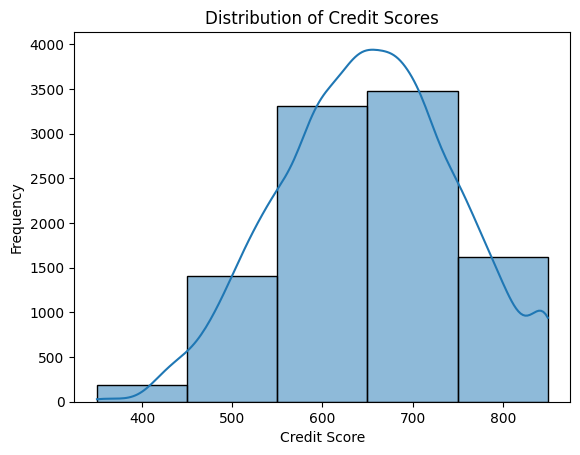

In [14]:
# Distribution of Credit Scores
sns.histplot(df['CreditScore'], bins=5, kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

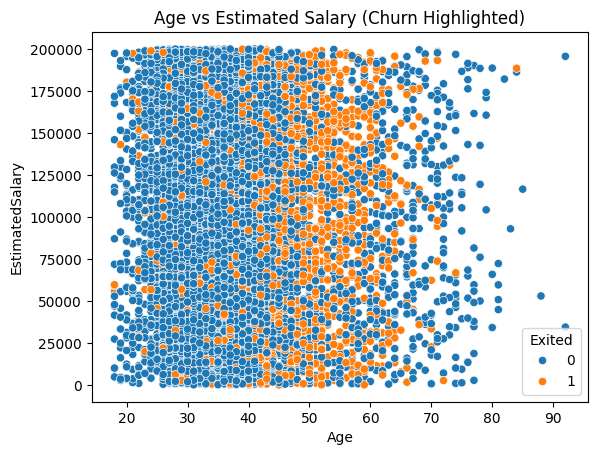

In [15]:
# Age vs. Estimated Salary
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Exited', data=df)
plt.title('Age vs Estimated Salary (Churn Highlighted)')
plt.show()

### 4. Train Test Split

In [16]:
# Divide the data into independent and dependent variables
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [17]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Scale these features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Save the scaled data into a pickle file
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

### 5. ANN Implementation

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from keras.layers import Input
import datetime

In [21]:
# Build ANN model
model = Sequential([
    # Define input shape
    Input(shape=(X_train.shape[1],)),
    # Hidden layer - 1 connected to input layer
    Dense(64, activation='relu'),
    # Hidden layer - 2
    Dense(32, activation='relu'),
    # Output layer
    Dense(1, activation='sigmoid')
])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Set up the tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [25]:
# Set up Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [26]:
# Train the model
history = model.fit(
    X_train, y_train, epochs=100, batch_size=32, 
    validation_data=(X_test, y_test), 
    callbacks=[tensorboard_callback,early_stopping])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7925 - loss: 0.4676 - val_accuracy: 0.8305 - val_loss: 0.4010
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8375 - loss: 0.3894 - val_accuracy: 0.8485 - val_loss: 0.3645
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8503 - loss: 0.3612 - val_accuracy: 0.8595 - val_loss: 0.3482
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8572 - loss: 0.3471 - val_accuracy: 0.8580 - val_loss: 0.3465
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8620 - loss: 0.3399 - val_accuracy: 0.8630 - val_loss: 0.3429
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8601 - loss: 0.3381 - val_accuracy: 0.8630 - val_loss: 0.3378
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8641 - loss: 0.3343 - val_accuracy: 0.8675 - val_loss: 0.3374
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8596 - loss: 0.3328 - val_accu

In [63]:
# Save the model using the native Keras format
model.save("model.keras")

In [64]:
# Load TensorBoard extension
%reload_ext tensorboard

In [65]:
%tensorboard --logdir logs/fit --port=6006

Reusing TensorBoard on port 6006 (pid 21048), started 0:01:13 ago. (Use '!kill 21048' to kill it.)

In [67]:
# Kill the task using the PID
!taskkill /PID 21048 /F

SUCCESS: The process with PID 21048 has been terminated.
